# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [1]:
GROUP_NO = 66 # group number
GROUP_MEMBERS = {
    441469: "Danqi Zhao", # mat. no. : name,
    436949: "Xingjian Tian",
    444572: "Jiaming Zhang",
}

---

In [2]:
# required imports
# do not edit!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Question 1: Preprocessing and Visualization (19 Points)

**About the Data: Heart Disease**

In this task, our data (`q1_heart_disease.csv`) contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. See below a short description for each column.

| Column         | Description                                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Age            | The age of the patient in years.                                                                                                  |
| Sex            | The sex of the patient.                                                                                                           |
| ChestPainType  | The type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomnic).                       |
| RestingBP      | The resting blood pressure in millimeter of mercury [mmHg].                                                                       |
| Cholesterol    | The cholesterol of the blood serum in milligrams per deciliter (mg/dl).                                                           |
| FastingBS      | 1 if the blood sugar while fasting is above 120 mg/dl, 0 otherwise.                                                               |
| RestingECG     | Results of the electrocardiogram when resting.                                                                                    |
| MaxHR          | The maximum heart rate achieved while exercising.                                                                                 |
| ExerciseAngina | If an Angina (pressure on chest) is inducible by exercising.                                                                      |
| Oldpeak        | Numerical measure of the depression of the ST segment of electrocardiogram induced by exercise relative to rest.                  |
| ST_Slope       | The slope of the peak exercise ST segment, where 0 corresponds to downsloping; 1 to a flat level, and 2 corresponds to upsloping. |
| HeartDisease   | Heart disease being present or not.                                                                                               |

## Part I: Preprocessing (11 pts)

### a)
First things first. Import the file **q1_heart_disease.csv** and save it into a dataframe named `heart_df`. Visualize the dataframe by showing the first five lines. 


In [3]:
# Import and visualization.
# YOUR CODE HERE
heart_df = pd.read_csv('datasets/q1_heart_disease.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


### b) 
i. Check the data types. Are there any data type problems (e.g., numerical columns having a non-numerical data type)?

In [4]:
# Visualizing data types
# YOUR CODE HERE

data_types = heart_df.dtypes
data_types

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

ii. Fix problems, if there are any data type problems. Further, improve categorical columns by setting them to the categorical type and translate boolean columns to boolean values.

In [5]:
# Fixing problems, if necessary
# YOUR CODE HERE
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             922 non-null    float64
 1   Sex             922 non-null    object 
 2   ChestPainType   922 non-null    object 
 3   RestingBP       922 non-null    float64
 4   Cholesterol     922 non-null    float64
 5   FastingBS       922 non-null    float64
 6   RestingECG      922 non-null    object 
 7   MaxHR           922 non-null    float64
 8   ExerciseAngina  922 non-null    object 
 9   Oldpeak         922 non-null    float64
 10  ST_Slope        922 non-null    object 
 11  HeartDisease    922 non-null    float64
dtypes: float64(7), object(5)
memory usage: 86.7+ KB


In [6]:
# Set categorical columns to categorial type.
# YOUR CODE HERE
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
heart_df[categorical_columns] = heart_df[categorical_columns].astype('category')

In [7]:
# Translate boolean columns to boolean type
# YOUR CODE HERE
heart_df['FastingBS'] = heart_df['FastingBS'].astype(bool)
heart_df['HeartDisease'] = heart_df['HeartDisease'].astype(bool)

In [8]:
# Checking again by visualizing data types
# YOUR CODE HERE
updated_data_types = heart_df.dtypes
updated_data_types

Age                float64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS             bool
RestingECG        category
MaxHR              float64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease          bool
dtype: object

### c)
i. In this subtask, we start with a first evaluation of our data by checking the plausibility of some entries. To make sure that we do not have a clash between intended NaN values and existing NaN values in the dataset, we first remove all NaN values. Report the number of rows containing a NaN value.

In [9]:
# YOUR CODE HERE
initial_row_count = heart_df.shape[0]
heart_df_cleaned = heart_df.dropna()
final_row_count = heart_df_cleaned.shape[0]
rows_with_nan = initial_row_count - final_row_count
rows_with_nan

2

ii. To check plausibility, create boxplots for all numerical features. Reason which features have invalid or missing values. Show and report such outliers. 

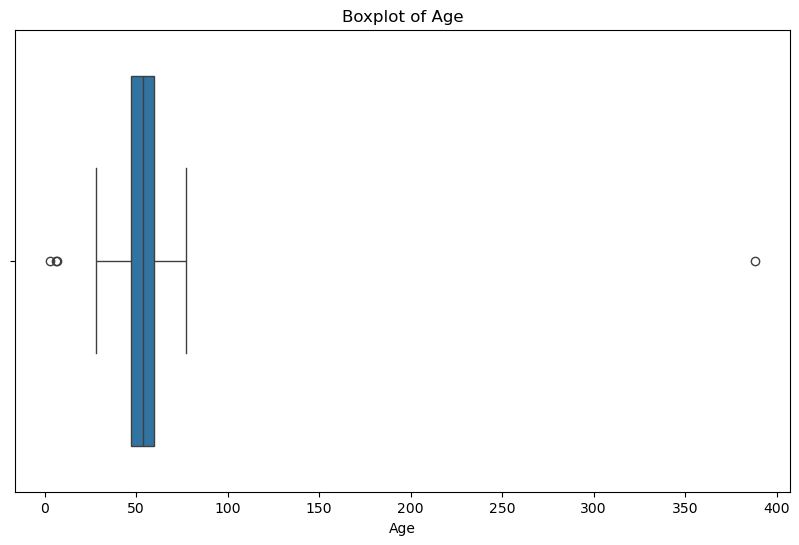

outliers count 4


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
8,7.0,F,ATA,145.0,207.0,True,Normal,130.0,N,1.5,Flat,True
92,6.0,M,ASY,140.0,139.0,False,Normal,140.0,N,0.0,Up,False
339,3.0,M,ASY,95.0,0.0,True,Normal,145.0,N,1.1,Down,True
597,388.0,M,ASY,160.0,256.0,True,ST,136.0,N,0.2,Up,False


In [10]:
# Creating the boxplot and calculating outliers
# YOUR CODE HERE
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

def identify_outlier_rows(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_condition = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return df[outlier_condition]

outlier_counts = {}
numerical_columns = heart_df.select_dtypes(include=['float64']).columns
outlier_entries = {}


for column in numerical_columns:
    outlier_entries[column] = identify_outlier_rows(heart_df, column)

plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_df['Age'])
plt.title('Boxplot of Age')
plt.show()


outlier_counts['Age'] = calculate_outliers(heart_df['Age'])
print('outliers count',outlier_counts['Age'])
outlier_entries['Age']


_Note: There may be more cells than what you may need for viewing and reporting the entries properly and nicely._

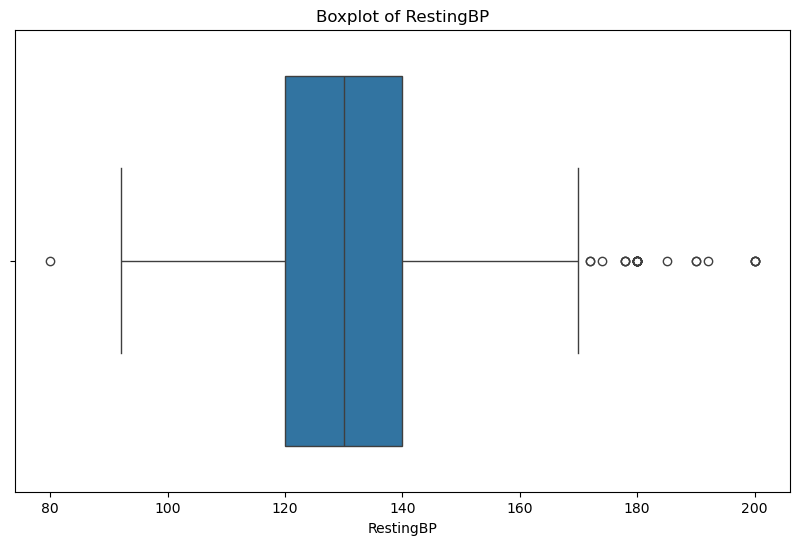

outliers count 27


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
111,39.0,M,ATA,190.0,241.0,False,Normal,106.0,N,0.0,Up,False
125,58.0,F,ATA,180.0,393.0,False,Normal,110.0,Y,1.0,Flat,True
191,53.0,M,ASY,180.0,285.0,False,ST,120.0,Y,1.5,Flat,True
192,46.0,M,ASY,180.0,280.0,False,ST,120.0,N,0.0,Up,False
243,54.0,M,ASY,200.0,198.0,False,Normal,142.0,Y,2.0,Flat,True
276,45.0,F,ATA,180.0,295.0,False,Normal,180.0,N,0.0,Up,False
277,59.0,M,NAP,180.0,213.0,False,Normal,100.0,N,0.0,Up,False
280,57.0,F,ASY,180.0,347.0,False,ST,126.0,Y,0.8,Flat,False
316,53.0,M,ASY,80.0,0.0,False,Normal,141.0,Y,2.0,Down,False
368,64.0,F,ASY,200.0,0.0,False,Normal,140.0,Y,1.0,Flat,True


In [11]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_df['RestingBP'])
plt.title('Boxplot of RestingBP')
plt.show()

outlier_counts['RestingBP'] = calculate_outliers(heart_df['RestingBP'])
print('outliers count',outlier_counts['RestingBP'])
outlier_entries['RestingBP']

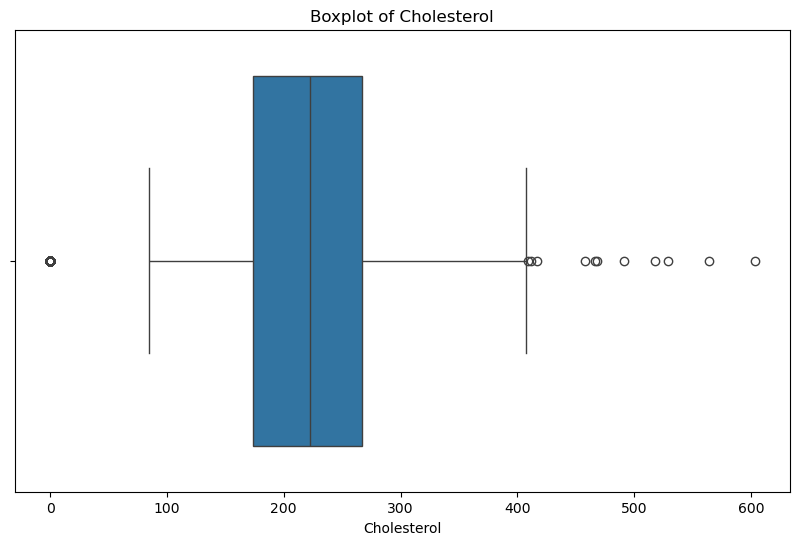

outliers count 183


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
29,53.0,F,ATA,113.0,468.0,False,Normal,127.0,N,0.0,Up,False
31,53.0,M,NAP,145.0,518.0,False,Normal,130.0,N,0.0,Flat,True
70,44.0,M,ASY,150.0,412.0,False,Normal,170.0,N,0.0,Up,False
77,32.0,M,ASY,118.0,529.0,False,Normal,130.0,N,0.0,Flat,True
105,40.0,M,ASY,120.0,466.0,True,Normal,152.0,Y,1.0,Flat,True
...,...,...,...,...,...,...,...,...,...,...,...,...
539,56.0,M,ASY,130.0,0.0,False,LVH,122.0,Y,1.0,Flat,True
540,62.0,M,NAP,133.0,0.0,True,ST,119.0,Y,1.2,Flat,True
621,67.0,F,NAP,115.0,564.0,False,LVH,160.0,N,1.6,Flat,False
672,65.0,F,NAP,140.0,417.0,True,LVH,157.0,N,0.8,Up,False


In [12]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_df['Cholesterol'])
plt.title('Boxplot of Cholesterol')
plt.show()

outlier_counts['Cholesterol'] = calculate_outliers(heart_df['Cholesterol'])
print('outliers count',outlier_counts['Cholesterol'])
outlier_entries['Cholesterol']

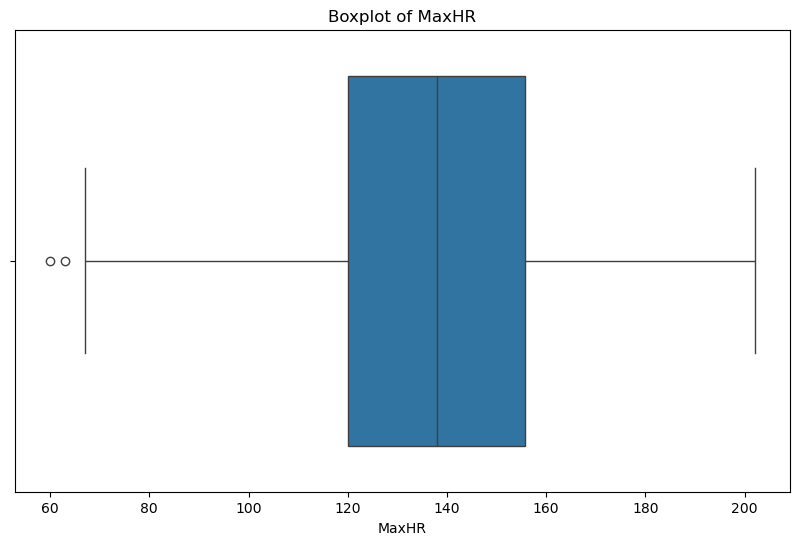

outliers count 2


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
373,60.0,M,ASY,135.0,0.0,False,Normal,63.0,Y,0.5,Up,True
393,51.0,M,ASY,140.0,0.0,False,Normal,60.0,N,0.0,Flat,True


In [13]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_df['MaxHR'])
plt.title('Boxplot of MaxHR')
plt.show()


outlier_counts['MaxHR'] = calculate_outliers(heart_df['MaxHR'])
print('outliers count',outlier_counts['MaxHR'])
outlier_entries['MaxHR']

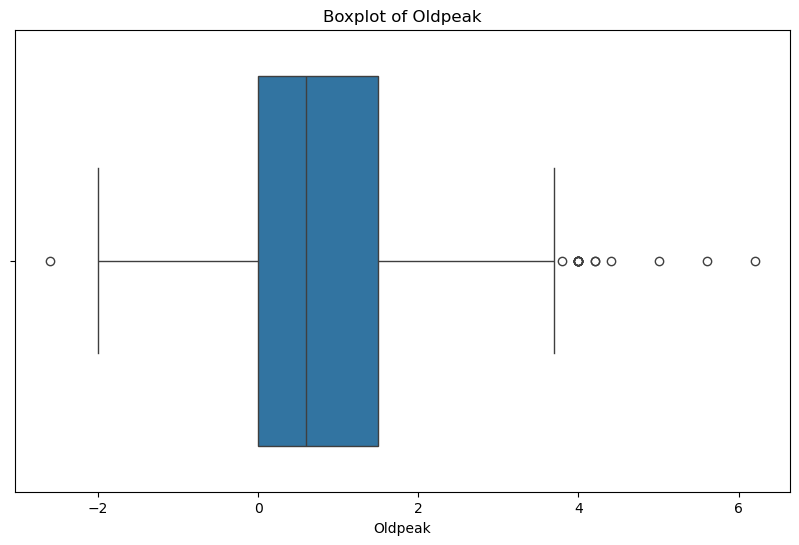

outliers count 16


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
69,52.0,M,ASY,160.0,246.0,False,ST,82.0,Y,4.0,Flat,True
168,50.0,M,ASY,140.0,231.0,False,ST,140.0,Y,5.0,Flat,True
326,46.0,M,ASY,100.0,0.0,True,ST,133.0,N,-2.6,Flat,True
503,65.0,M,ASY,136.0,248.0,False,Normal,140.0,Y,4.0,Down,True
525,61.0,M,ASY,120.0,282.0,False,ST,135.0,Y,4.0,Down,True
541,74.0,M,ASY,150.0,258.0,True,ST,130.0,Y,4.0,Down,True
563,64.0,M,ASY,134.0,273.0,False,Normal,102.0,Y,4.0,Down,True
629,63.0,F,ASY,150.0,407.0,False,LVH,154.0,N,4.0,Flat,True
707,59.0,M,TA,178.0,270.0,False,LVH,145.0,N,4.2,Down,False
737,56.0,F,ASY,200.0,288.0,True,LVH,133.0,Y,4.0,Down,True


In [14]:
# Potential viewing and reporting of outlier entries
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_df['Oldpeak'])
plt.title('Boxplot of Oldpeak')
plt.show()


outlier_counts['Oldpeak'] = calculate_outliers(heart_df['Oldpeak'])
print('outliers count',outlier_counts['Oldpeak'])
outlier_entries['Oldpeak']

iii. Decide and briefly reason which entries can be kept such that some values can be imputed later and which entries have to be deleted. Apply the preprocessing by either deleting entries or by replacing values that should be imputed by setting their value to NaN respectively. Report for both processings how many entries are effected.

__Student Answer:__ 
- Age: Data like 3,6,7 and 388 years old outliers will be deleted, since it might be data errors. Especially 388 years old.
- RestingBP: The data with extremely high and low should be deleted like less than and equal to 80 and higher than 200, since it might be data error, the other value can be imputed.
- Oldpeak: Extreme values in ST depression, especially negative values, are likely erroneous and should be deleted.
- Cholesterol: Values higher than 500 might be erroneous. These can be set to NaN for later imputation.
- MaxHR: Extremely low maximum heart rates like less than 60 might indicate measurement errors, these can be set to NaN for imputation.


In [15]:
# Potential removing of outliers, reporting their number, and showing of the resulting dataframe
# YOUR CODE HERE
age_outliers_indices = heart_df[(heart_df['Age'] < 10) | (heart_df['Age'] > 100)].index
restingbp_outliers_indices = heart_df[(heart_df['RestingBP'] < 80) | (heart_df['RestingBP'] > 200)].index
oldpeak_outliers_indices = heart_df[heart_df['Oldpeak'] < 0].index
cholesterol_outliers_indices = outlier_entries['Cholesterol'].index
maxhr_outliers_indices = outlier_entries['MaxHR'].index


In [16]:
# Potential replacing of values with NaN, reporting their number, and showing of the resulting dataframe
# YOUR CODE HERE
indices_to_delete = set(age_outliers_indices) | set(restingbp_outliers_indices) | set(oldpeak_outliers_indices)
deleted_entries_count = len(indices_to_delete)
heart_df.drop(indices_to_delete, inplace=True, errors='ignore')


valid_cholesterol_indices = [idx for idx in cholesterol_outliers_indices if idx in heart_df.index]
valid_maxhr_indices = [idx for idx in maxhr_outliers_indices if idx in heart_df.index]


imputed_entries_count = len(valid_cholesterol_indices) + len(valid_maxhr_indices)
heart_df.loc[valid_cholesterol_indices, 'Cholesterol'] = pd.NA
heart_df.loc[valid_maxhr_indices, 'MaxHR'] = pd.NA
print('deleted entries',deleted_entries_count)
print('imputed entries',imputed_entries_count)
heart_df

deleted entries 17
imputed entries 172


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,False,Normal,172.0,N,0.0,Up,False
1,49.0,F,NAP,160.0,180.0,False,Normal,156.0,N,1.0,Flat,True
2,37.0,M,ATA,130.0,283.0,False,ST,98.0,N,0.0,Up,False
3,48.0,F,ASY,138.0,214.0,False,Normal,108.0,Y,1.5,Flat,True
4,54.0,M,NAP,150.0,195.0,False,Normal,122.0,N,0.0,Up,False
...,...,...,...,...,...,...,...,...,...,...,...,...
918,45.0,M,TA,110.0,264.0,False,Normal,132.0,N,1.2,Flat,True
919,68.0,M,ASY,144.0,193.0,True,Normal,141.0,N,3.4,Flat,True
920,57.0,M,ASY,130.0,131.0,False,Normal,115.0,Y,1.2,Flat,True
921,57.0,F,ATA,130.0,236.0,False,LVH,174.0,N,0.0,Flat,True


iv. To give yourself a better insight, plot the resulting dataframe again using boxplots.

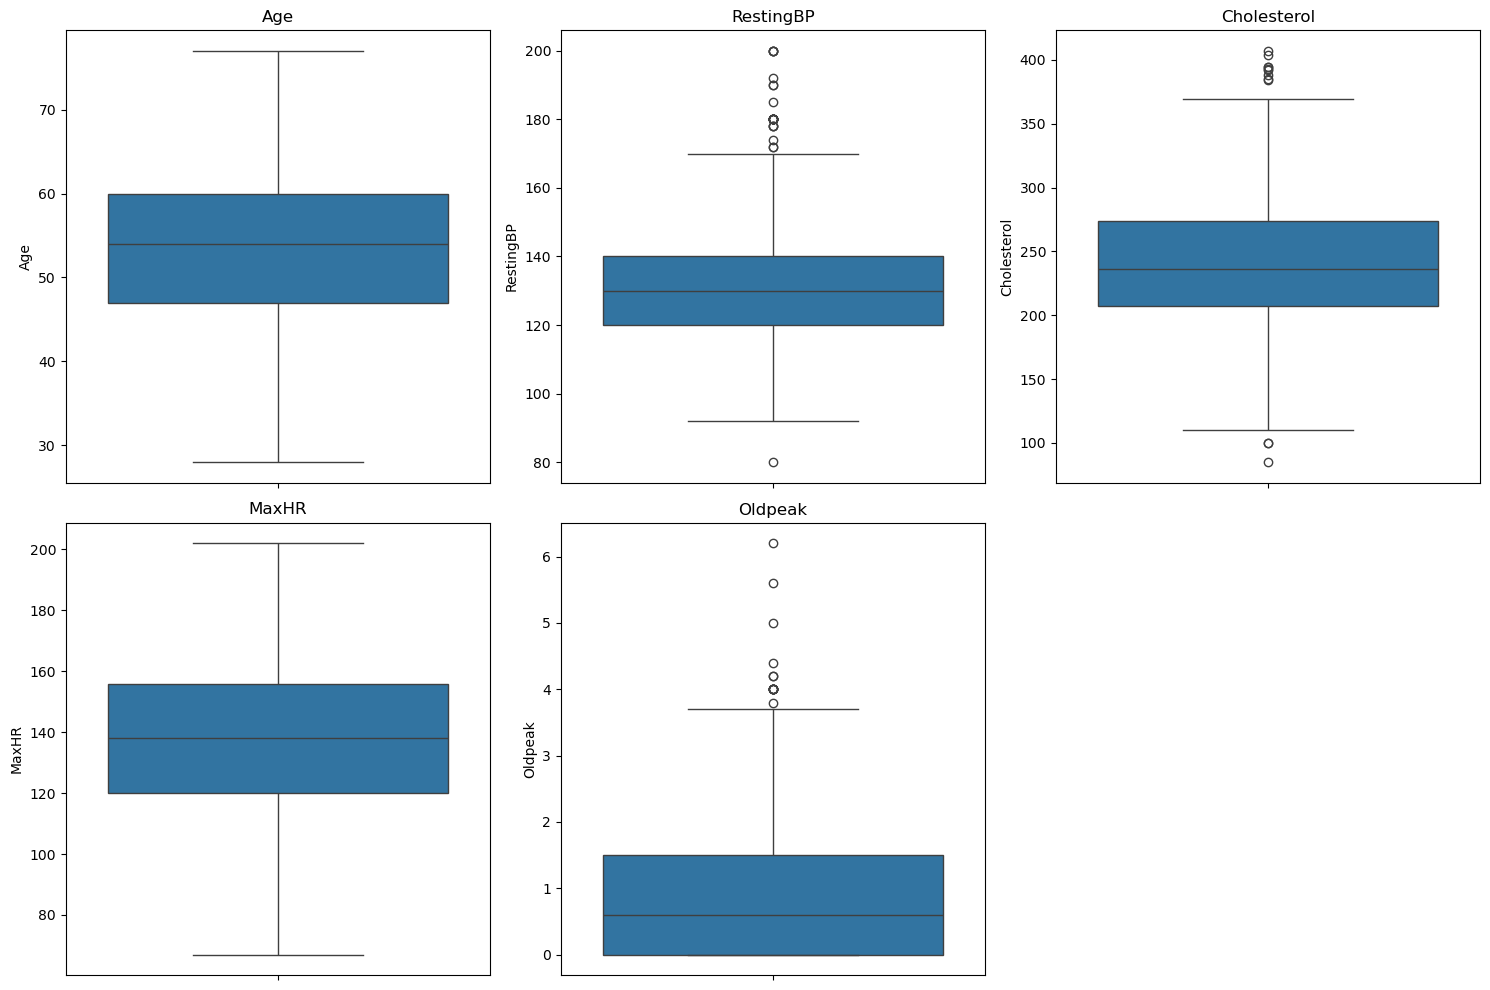

In [17]:
# Creating a boxplot
# YOUR CODE HERE
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### d)
In this task, we apply one-hot encoding for all categorical and all boolean features. This is used later for visualization. Afterwards, show the resulting dataframe.

In [18]:
# Replacing categorical and boolean features with one-hot encoded columns
# YOUR CODE HERE
categorical_and_boolean_columns = heart_df.select_dtypes(include=['category', 'bool']).columns
heart_df_encoded = pd.get_dummies(heart_df, columns=categorical_and_boolean_columns, drop_first=True)


heart_df_encoded.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_True,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_True
0,40.0,140.0,289.0,172.0,0.0,True,True,False,False,False,True,False,False,False,True,False
1,49.0,160.0,180.0,156.0,1.0,False,False,True,False,False,True,False,False,True,False,True
2,37.0,130.0,283.0,98.0,0.0,True,True,False,False,False,False,True,False,False,True,False
3,48.0,138.0,214.0,108.0,1.5,False,False,False,False,False,True,False,True,True,False,True
4,54.0,150.0,195.0,122.0,0.0,True,False,True,False,False,True,False,False,False,True,False


### e)
i. In this task, we want to impute missing values based on their k-nearest neighbor. Therefore, as a first step, create a reduced dataframe that contains the column(s) with missing values and with columns that correlate with the missing value. To decide which features (weakly) correlate, consider the correlation matrix in the figure below that is taken from literature (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/). Consider all features that have an absolute value for the correlation coefficient of at least 0.1 with the missing value.

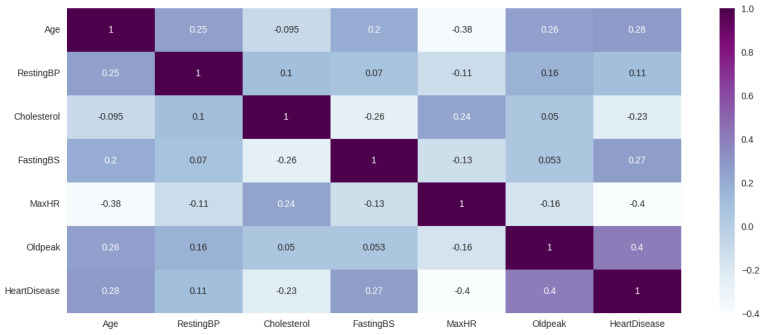

Figure 1: Correlation matrix between different features from Literature. (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/)

In [19]:
# Creating a dataframe with the values to be imputed and the correlating columns
# YOUR CODE HERE
missing_value_columns = heart_df_encoded.columns[heart_df_encoded.isnull().any()].tolist()
missing_value_columns


['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [20]:
correlated_features = {
    'Age': ['RestingBP', 'FastingBS_True', 'Oldpeak', 'HeartDisease_True'],
    'RestingBP': ['Age', 'Cholesterol', 'Oldpeak', 'HeartDisease_True'],
    'Cholesterol': ['RestingBP', 'MaxHR'],
    'MaxHR': ['Cholesterol'],
    'Oldpeak':['Age', 'RestingBP', 'HeartDisease_True'],
}


columns_to_include = set()
for key, values in correlated_features.items():
    columns_to_include.add(key)
    columns_to_include.update(values)

reduced_heart_df = heart_df_encoded[list(columns_to_include)]

reduced_heart_df

,Cholesterol,HeartDisease_True,MaxHR,FastingBS_True,RestingBP,Oldpeak,Age
0,289.0,False,172.0,False,140.0,0.0,40.0
1,180.0,True,156.0,False,160.0,1.0,49.0
2,283.0,False,98.0,False,130.0,0.0,37.0
3,214.0,True,108.0,False,138.0,1.5,48.0
4,195.0,False,122.0,False,150.0,0.0,54.0
...,...,...,...,...,...,...,...
918,264.0,True,132.0,False,110.0,1.2,45.0
919,193.0,True,141.0,True,144.0,3.4,68.0
920,131.0,True,115.0,False,130.0,1.2,57.0
921,236.0,True,174.0,False,130.0,0.0,57.0


__Student Answer:__ 
- Age with 'RestingBP' 0.25, 'FastingBS' 0.2, 'Oldpeak' 0.26, 'HeartDisease' 0.28.
- RestingBP with 'Age' 0.25, 'Cholesterol' 0.1, 'Oldpeak' 0.16, 'HeartDisease' 0.11.
- Cholesterol with 'RestingBP' 0.1, 'MaxHR' 0.24.
- MaxHR with 'Cholesterol' 0.24.
- Oldpeak with 'Age' 0.26, 'RestingBP' 0.16, 'HeartDisease' 0.4.

ii. Next, use k-nearest neighbor imputation with $k = 5$. Impute the missing values. Update the dataframe `heart_df`.

In [21]:
# Applying k-nearest neighbor imputation
# YOUR CODE HERE
knn_imputer = KNNImputer(n_neighbors=5)

heart_df_encoded_imputed = knn_imputer.fit_transform(reduced_heart_df)

heart_df_encoded_imputed_df = pd.DataFrame(heart_df_encoded_imputed, columns=reduced_heart_df.columns)

heart_df_encoded_imputed_df

,Cholesterol,HeartDisease_True,MaxHR,FastingBS_True,RestingBP,Oldpeak,Age
0,289.0,0.0,172.0,0.0,140.0,0.0,40.0
1,180.0,1.0,156.0,0.0,160.0,1.0,49.0
2,283.0,0.0,98.0,0.0,130.0,0.0,37.0
3,214.0,1.0,108.0,0.0,138.0,1.5,48.0
4,195.0,0.0,122.0,0.0,150.0,0.0,54.0
...,...,...,...,...,...,...,...
901,264.0,1.0,132.0,0.0,110.0,1.2,45.0
902,193.0,1.0,141.0,1.0,144.0,3.4,68.0
903,131.0,1.0,115.0,0.0,130.0,1.2,57.0
904,236.0,1.0,174.0,0.0,130.0,0.0,57.0


In [22]:
# Updating the imputed column(s)
# YOUR CODE HERE
for column in heart_df_encoded_imputed_df.columns:
    if column in heart_df.columns:
        heart_df[column] = heart_df_encoded_imputed_df[column]

heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,False,Normal,172.0,N,0.0,Up,False
1,49.0,F,NAP,160.0,180.0,False,Normal,156.0,N,1.0,Flat,True
2,37.0,M,ATA,130.0,283.0,False,ST,98.0,N,0.0,Up,False
3,48.0,F,ASY,138.0,214.0,False,Normal,108.0,Y,1.5,Flat,True
4,54.0,M,NAP,150.0,195.0,False,Normal,122.0,N,0.0,Up,False
...,...,...,...,...,...,...,...,...,...,...,...,...
918,NaN,M,TA,NaN,NaN,False,Normal,NaN,N,NaN,Flat,True
919,NaN,M,ASY,NaN,NaN,True,Normal,NaN,N,NaN,Flat,True
920,NaN,M,ASY,NaN,NaN,False,Normal,NaN,Y,NaN,Flat,True
921,NaN,F,ATA,NaN,NaN,False,LVH,NaN,N,NaN,Flat,True


## Part II: Advanced Visualization (8 pts)

In this question, we continue using the preprocessed data from Part I.

### a)
In this task, visualize the relation by plotting each pair of numerical features. Visualize the instances in the pairplots of those individuals that have and that do not have heart disease.

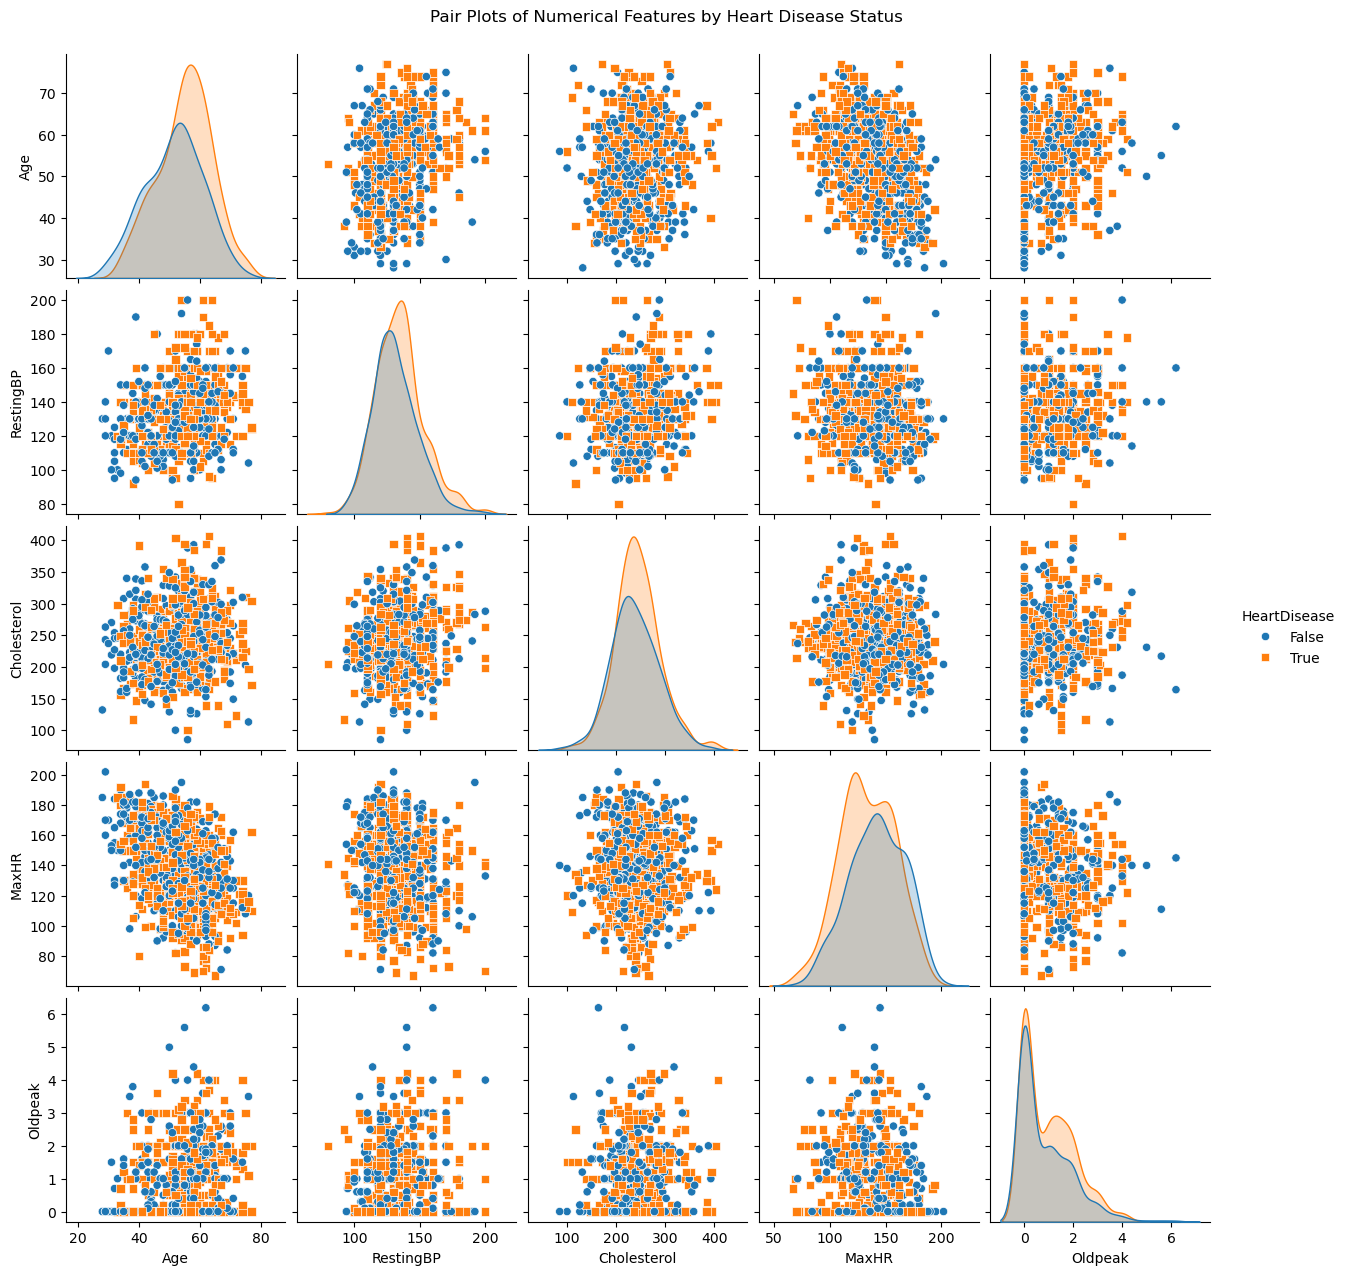

In [23]:
# Visualizing the relation between the numerical values using a pairplot, where the entries are classified by whether a heart disease is present 
# YOUR CODE HERE
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

pair_plot = sns.pairplot(data=heart_df, vars=numerical_features, hue='HeartDisease', diag_kind='kde', markers=["o", "s"])

pair_plot.fig.suptitle("Pair Plots of Numerical Features by Heart Disease Status", y=1.02)

plt.show()

### b)
i. Having the pairplot, we are interested in more details on the relation between the age of a patient and maximum heart rate. Therefore, create plot that shows the regression line between both features.

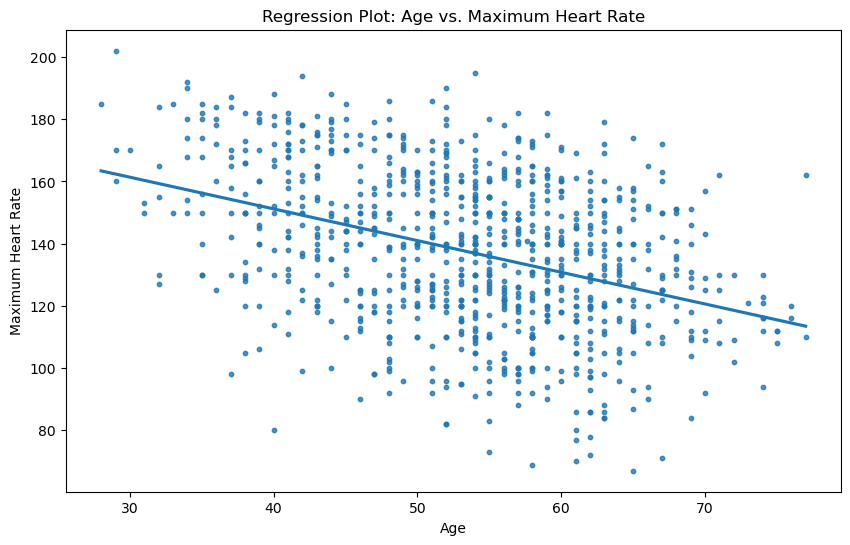

In [24]:
# Plotting age and maximum heart rate with regression line
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='MaxHR', data=heart_df, scatter_kws={"s": 10}, ci=None)

plt.title("Regression Plot: Age vs. Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

plt.show()

ii. Given our evaluation from task b-i), we are not sure if Simpson's Paradox occurs or not. Give some short reasoning, and if needed, do some experiment to check whether Simpson's Paradox occurs.

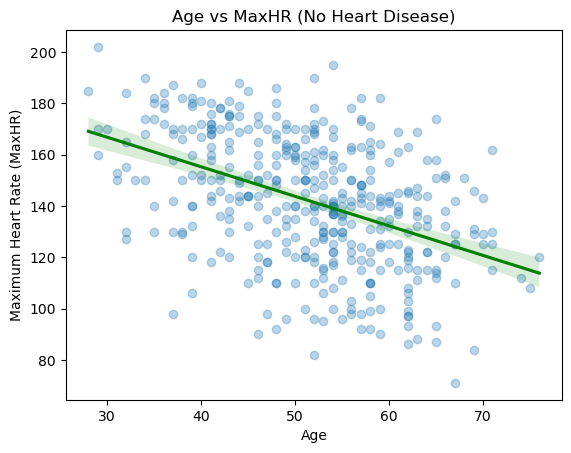

In [25]:
# Potential code for Simpson's Paradox testing
# YOUR CODE HERE
sns.regplot(x='Age', y='MaxHR', data=heart_df[heart_df['HeartDisease'] == False],
            line_kws={'color': 'green'}, scatter_kws={'alpha':0.3})
plt.title('Age vs MaxHR (No Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (MaxHR)')
plt.show()

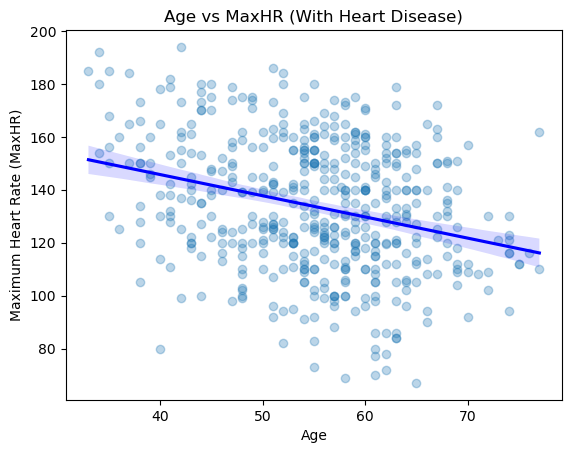

In [26]:
# Potential code for Simpson's Paradox testing
# YOUR CODE HERE
sns.regplot(x='Age', y='MaxHR', data=heart_df[heart_df['HeartDisease'] == True],
            line_kws={'color': 'blue'}, scatter_kws={'alpha':0.3})
plt.title('Age vs MaxHR (With Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (MaxHR)')
plt.show()

__Student Answer:__ Since do not see a reversal of the trend between the two subgroups, in that case, it might be a Simpson's Paradox.

### c)
In this task, we want to obtain a deeper understanding of the characteristics of each state of the former categorical or boolean features. Therefore, we create a heatmap that can be used to get a first impression of which value of which feature correlates with each other feature. 

i. Create a dataframe that contains as its columns the feature states and as its index all the column names of `heart_df`. Each entry is the sum of entries that have such a combination of features being true for the one-hot encoded features. For example, given the entries:
| ID | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|----|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1  | True          | False          | True            | False           | False           | True            | False           |
| 2  | True          | False          | False           | True            | False           | True            | False           |
| 3  | False         | True           | False           | True            | False           | True            | False           |

In this example, we would obtain the following entries as a result:

|                 | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|-----------------|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| Feature1_True   | 2             | 0              | 1               | 1               | 0               | 2               | 0               |
| Feature1_False  | 0             | 1              | 0               | 1               | 0               | 1               | 0               |
| Feature2_StateA | 1             | 0              | 1               | 0               | 0               | 1               | 0               |
| Feature2_StateB | 1             | 1              | 0               | 2               | 0               | 2               | 0               |
| Feature2_StateC | 0             | 0              | 0               | 0               | 0               | 0               | 0               |
| Feature3_StateA | 2             | 1              | 1               | 2               | 0               | 3               | 0               |
| Feature3_StateB | 0             | 0              | 0               | 0               | 0               | 0               | 0               |

In [27]:
# Creating the data for the heatmap.
# YOUR CODE HERE
one_hot_encoded_df = pd.get_dummies(heart_df)
binary_columns_full = one_hot_encoded_df.loc[:, (one_hot_encoded_df.isin([0, 1])).all()]

sum_true_states_binary_df = pd.DataFrame(index=binary_columns_full.columns, columns=binary_columns_full.columns)

for col in binary_columns_full.columns:
    for row in binary_columns_full.columns:
        sum_true_states_binary_df.loc[row, col] = (binary_columns_full[row] & binary_columns_full[col]).sum()

sum_true_states_binary_df

,FastingBS,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
FastingBS,208,164,27,180,135,19,41,12,41,107,59,110,97,24,123,60
HeartDisease,164,500,51,448,385,24,71,19,105,280,114,185,314,47,375,77
Sex_F,27,51,194,0,70,60,53,10,47,118,28,150,43,7,75,111
Sex_M,180,448,0,711,419,113,144,35,140,426,145,386,325,54,379,278
ChestPainType_ASY,135,385,70,419,489,0,0,0,102,280,107,195,294,44,315,130
ChestPainType_ATA,19,24,60,113,0,173,0,0,23,123,27,156,17,3,32,138
ChestPainType_NAP,41,71,53,144,0,0,198,0,47,120,31,146,52,10,86,102
ChestPainType_TA,12,19,10,35,0,0,0,45,15,22,8,39,6,4,21,20
RestingECG_LVH,41,105,47,140,102,23,47,15,187,0,0,114,73,17,96,74
RestingECG_Normal,107,280,118,426,280,123,120,22,0,545,0,339,206,30,262,253


ii. Next, create the heatmap based on the data from the last subtask. If necessary, improve readability of the visualization.

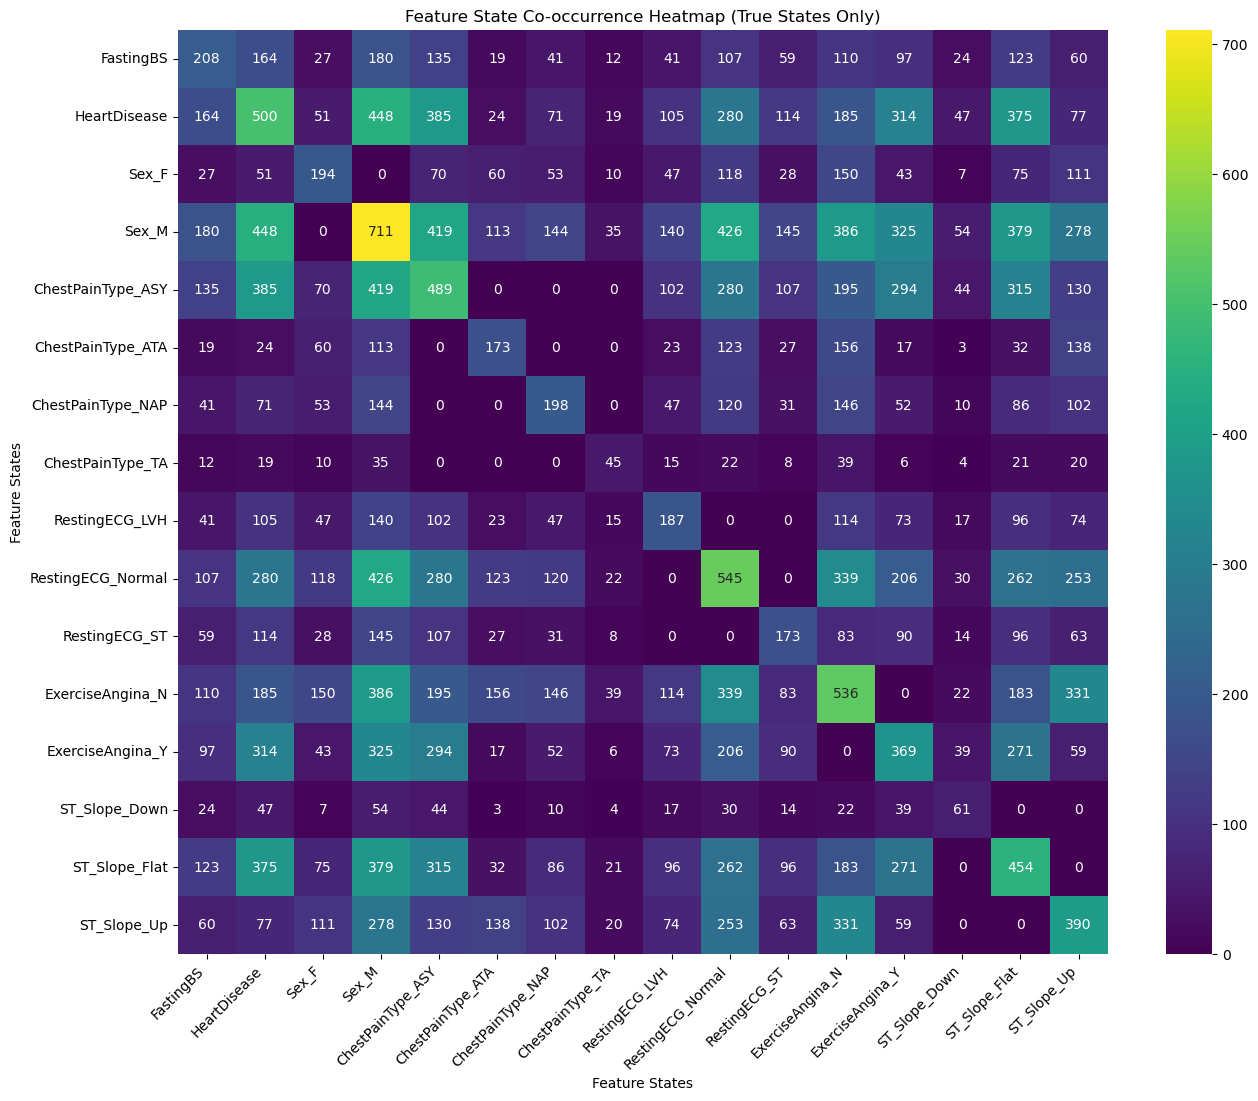

In [28]:
# Visualizing the obtained heatmap
# YOUR CODE HERE
plt.figure(figsize=(15, 12))

sns.heatmap(sum_true_states_binary_df.astype(int), annot=True, fmt="d", cmap="viridis")

plt.title("Feature State Co-occurrence Heatmap (True States Only)")
plt.xlabel("Feature States")
plt.ylabel("Feature States")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

Given the heatmap, briefly derive some insights towards the different values of a feature. I.e., you may choose a heart disease being present or not and argue about what correlates for the other features for each value.

__Student Answer:__ From the heatmap,
- Gender: There's a significant co-occurrence of heart disease with the feature "Sex_M", indicated by the high count in that cell. This suggests that in this dataset, men have a higher incidence of heart disease compared to women.
- ChestPainType: The type of chest pain "ChestPainType_ASY" has a high co-occurrence with heart disease, with "ChestPainType_ASY" is also correlated with "Sex_M", "ST_Slope_Flat".
- ST_Slope: The "ST_Slope_Flat" feature has a high co-occurrence with heart disease, which could indicate that a flat ST segment in ECG readings is a common feature in patients with heart disease, and this feature is also correlated with "Sex_M", "ChestPainType_ASY", "ExerciseAngina_Y".
- ExerciseAngina: There's a notable co-occurrence with "ExerciseAngina_Y", which suggests that experiencing angina (chest pain) during exercise is common among those with heart disease.
- RestingECG: There's a relatively high co-occurrence with "RestingECG_ST", which could indicate that ECG abnormalities are common among those with heart disease.

